# Company Bankruptcy Prediction

Project aim : To build a classification model that predicts company bankruptcy using 
financial ratios and operational metrics 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Load Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.shape

(6819, 96)

In [4]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Clean column names using string stripping to avoid silent bugs during feature selection

In [6]:
df.columns = df.columns.str.strip()

In [7]:
# Check Missing Values
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
df.isnull().sum().sum() * 100

0

In [9]:
# Check duplicated Values
df.duplicated().sum()

0

# Statistical summary

In [10]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Target variable check

In [11]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

Target Variable Distribution

Text(0, 0.5, 'Count')

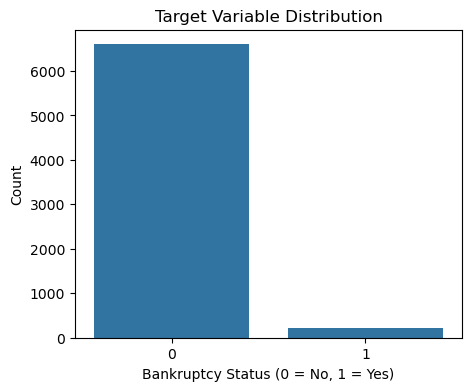

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Bankruptcy Status (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Class Imbalance Analysis:
The target variable Bankrupt? is highly imbalanced. Only a small percentage of companies are bankrupt compared to non-bankrupt companies.

# Correlation with target variable

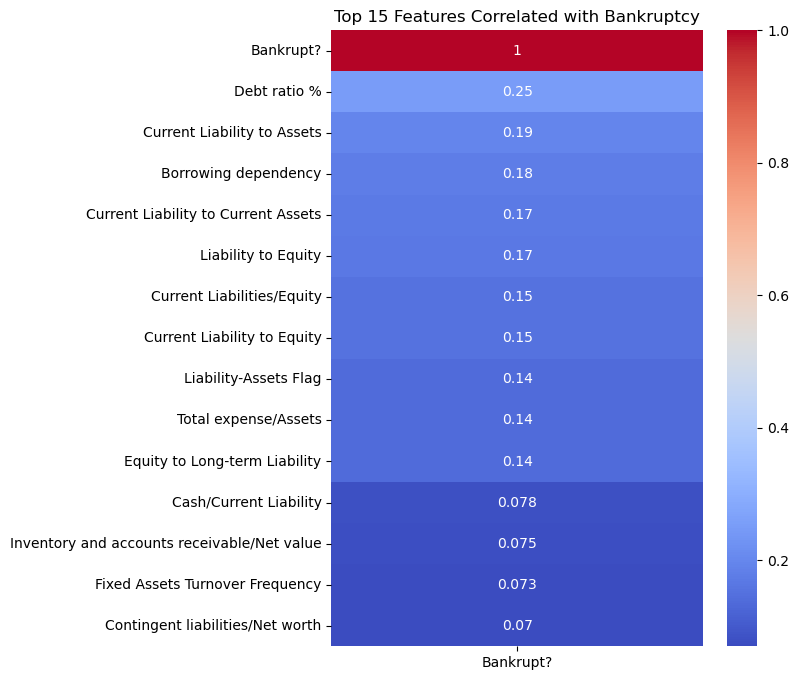

In [13]:
corr = df.corr()

top_corr = corr['Bankrupt?'].sort_values(ascending=False).head(15)

plt.figure(figsize=(6,8))
sns.heatmap(
    top_corr.to_frame(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Top 15 Features Correlated with Bankruptcy');

# Data Preprocessing

In [14]:
# Separate Input and Output 
X = df.drop(['Bankrupt?'],axis = 1) 
y = df['Bankrupt?']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

# Baseline Model (Logistic Regression)

In [16]:
pipeline_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter = 5000,
        class_weight = 'balanced'
    ))
])

In [25]:
# Train baseline model
pipeline_lr.fit(X_train, y_train);

In [18]:
# Prediction on Test data
y_pred = pipeline_lr.predict(X_test)

# probabily
y_prob = pipeline_lr.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC :', roc_auc_score(y_test, y_prob))

[[1162  158]
 [   8   36]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364

ROC-AUC : 0.9171487603305785


# Baseline Model Evaluation:
The Logistic Regression model achieved a high recall of 82% for bankrupt companies, indicating strong ability to detect financial distress. Although precision is low due to class imbalance, this trade-off is acceptable in bankruptcy prediction where missing a bankrupt company is more costly. The ROC-AUC score of 0.91 demonstrates strong discriminatory power.

# Random Forest

In [26]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train);

In [20]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

[[1316    4]
 [  35    9]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.69      0.20      0.32        44

    accuracy                           0.97      1364
   macro avg       0.83      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364

ROC-AUC: 0.950559573002755


# Feature Importance

In [22]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_rf.head(10)

,Feature,Importance
18,Persistent EPS in the Last Four Seasons,0.043692
39,Borrowing dependency,0.043231
35,Total debt/Total net worth,0.042422
85,Net Income to Total Assets,0.041873
9,Continuous interest rate (after tax),0.041462
36,Debt ratio %,0.034591
37,Net worth/Assets,0.033269
94,Equity to Liability,0.031140
67,Retained Earnings to Total Assets,0.029227
68,Total income/Total expense,0.028590


# Threshold Tuning

In [23]:
# Change default threshold 0.5 to 0.3
threshold = 0.3
y_pred_tuned = (y_prob >= threshold).astype(int)

In [24]:
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

[[1051  269]
 [   4   40]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1320
           1       0.13      0.91      0.23        44

    accuracy                           0.80      1364
   macro avg       0.56      0.85      0.56      1364
weighted avg       0.97      0.80      0.86      1364



The default classification threshold of 0.5 was adjusted to improve the
detection of bankrupt companies. Since missing a bankrupt company is more
costly than issuing a false warning, a lower threshold was evaluated.
This improved recall while accepting additional false positives.

# Conclusion

This project developed a machine learning model to predict company bankruptcy using financial ratios. After evaluating multiple models, Logistic Regression was selected due to its high recall and strong ROC-AUC performance. Threshold tuning further improved bankruptcy detection, reducing missed bankrupt cases. Feature importance analysis revealed that profitability and debt-related ratios are key indicators of financial distress